In [11]:
%pylab inline

import seaborn as sns
import numpy as np

from sigvisa.plotting.event_heatmap import EventHeatmap
from sigvisa.source.event import get_event
from sigvisa import Sigvisa

Populating the interactive namespace from numpy and matplotlib


88
AAK 6 -6 23374455.325 13162756.5518
AFI 6 -6 915289.116772 7129542.53452
AKTO 6 -6 21723987.5925 13981458.9358
ANMO 6 -6 7513954.65092 12348810.8639
ASF 6 -6 20305046.1451 12051605.7393
ATAH 6 -6 9607536.60088 7853242.93095
ATD 6 -6 21006133.9529 9847270.821
ATTU 6 -6 30869109.7887 14232651.7826
BBB 6 -6 6660826.03304 14161453.1924
BBTS 6 -6 15441417.3514 10181700.0621
BDFB 6 -6 12504937.8907 6944448.20931
BORG 6 -6 15453744.6149 15400560.3621
BOSA 6 -6 19284507.5729 5558320.01805
CFAA 6 -6 10837706.8544 5239802.75549
CMIG 6 -6 8149430.58775 10441385.879
CPUP 6 -6 11738822.9101 5802375.80487
CTA 6 -6 30540871.9133 6469499.02558
DAV 6 -6 28807997.5462 9370804.61314
DAVOX 6 -6 17813348.9975 13600598.3821
DBIC 6 -6 16529547.2238 9328082.06245
DLBC 6 -6 7043746.14956 14790674.3905
DZM 6 -6 32359484.9089 6257990.75595
EIL 6 -6 20156570.8377 11785579.0333
ELK 6 -6 7002697.78584 12965681.5806
FITZ 6 -6 28669820.4913 6682000.45068
FRB 6 -6 12008082.5924 15305877.6642
GNI 6 -6 20875100.4994 

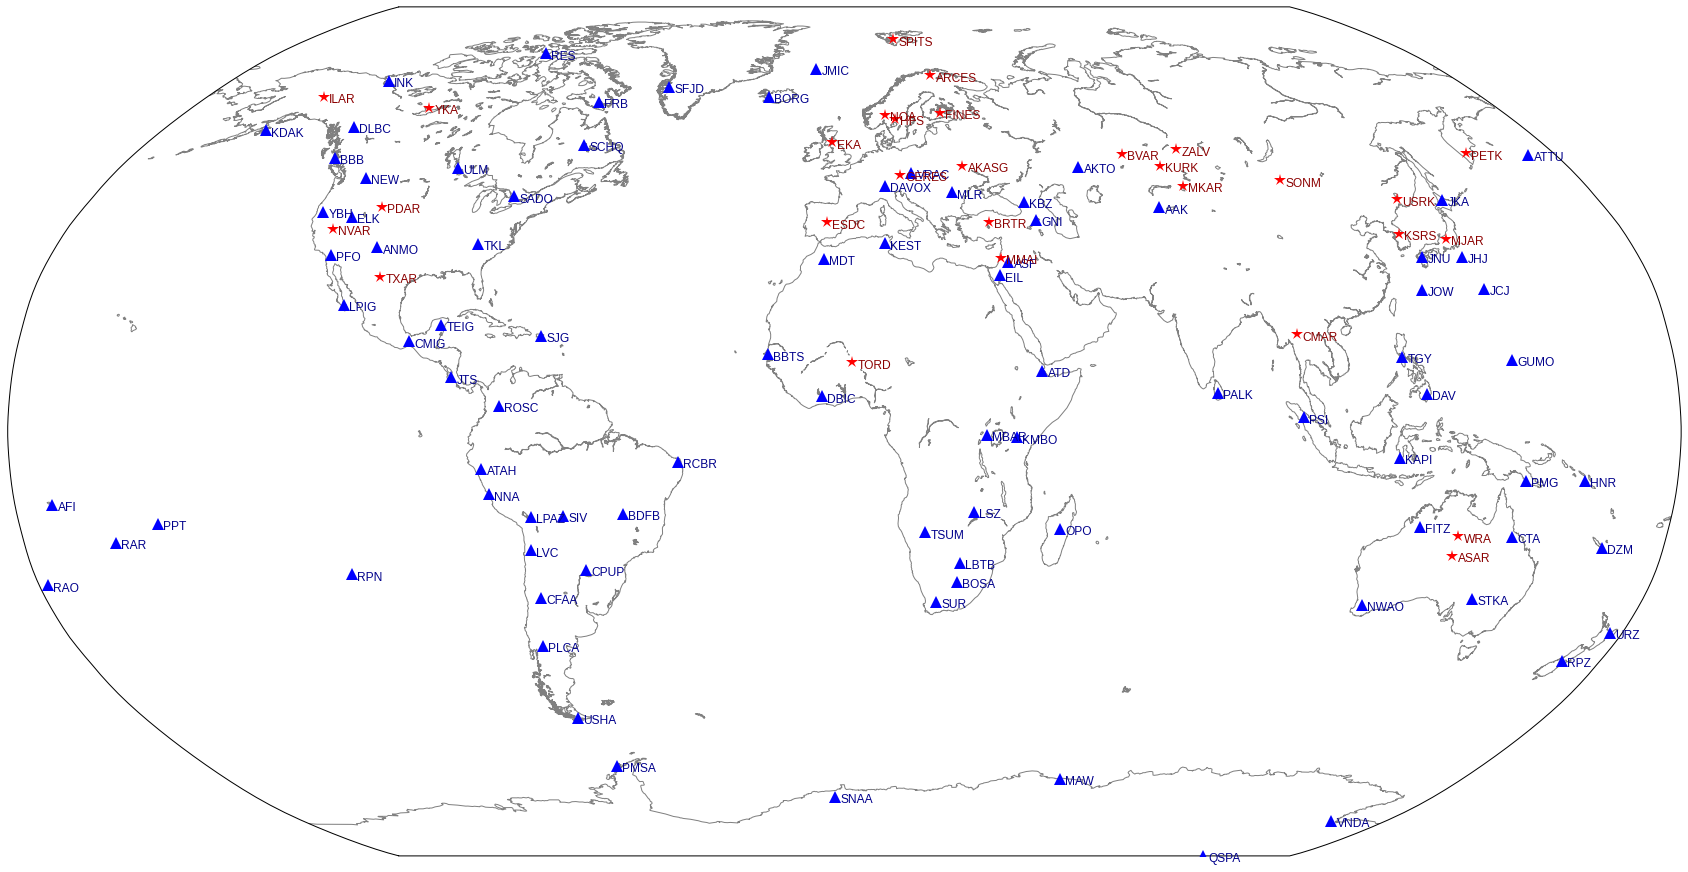

In [114]:
sns.set_style("white")
hm = EventHeatmap(f=None, calc=False, left_lon=-180, right_lon=180, bottom_lat=-90, top_lat=90)

f = plt.figure(figsize=(30, 30))
ax = gca()
hm.init_bmap(axes=ax, coastlines=False, nofillcontinents=True, projection="robin")
hm.bmap.drawcoastlines(zorder=1, color="gray")
#hm.plot_earth(y_fontsize=14, x_fontsize=14)


s = Sigvisa()
sites = s.sql("select sta, lon, lat from static_siteid where statype='ss'")
site_names = [st[0] for st in sites]
site_locs = np.asarray([st[1:] for st in sites])
print len(site_names)

hm.plot_locations(site_locs, labels=site_names, marker="^", ms=12, mfc="blue", mec="blue", mew=0, alpha=1,
                    offmap_arrows=False, label_color="darkblue", label_pts=12, label_y_off=-6, edge_x_off=6, edge_y_off=-6)

sites = s.sql("select sta, lon, lat from static_siteid where statype='ar'")
site_names = [st[0] for st in sites]
site_locs = np.asarray([st[1:] for st in sites])
print len(site_names)

hm.plot_locations(site_locs, labels=site_names, marker="*", ms=12, mfc="red", mec="blue", mew=0, alpha=1,
                    offmap_arrows=False, label_color="darkred", label_pts=12, label_y_off=-6, edge_x_off=6, edge_y_off=-6)

In [115]:
print len(site_names)

29


In [4]:
from sigvisa.signals.io import load_event_station

seg = load_event_station(5270227, "FITZ")

loading sta FITZ chan BHZ time [1237699096.1, 1237699505.1]  ... successfully loaded.
loading sta FITZ chan BHN time [1237699096.1, 1237699505.1]  ... successfully loaded.
loading sta FITZ chan BHE time [1237699096.1, 1237699505.1]  ... successfully loaded.


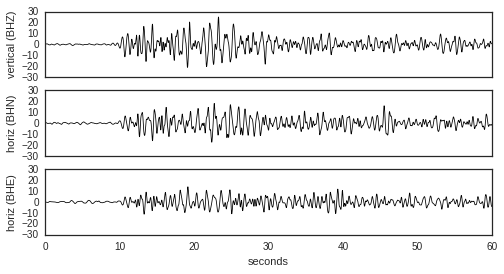

In [5]:
segf = seg.with_filter("freq_0.8_4.5")

bhz = segf["BHZ"]
bhn = segf["BHN"]
bhe = segf["BHE"]

t = np.linspace(-20, len(bhz.data)/40.0 -20, len(bhz.data))

f = plt.figure(figsize=(8, 4))
ax1 = f.add_subplot(311)
ax1.plot(t, bhz.data, lw=0.8, color='black')
ax1.set_ylabel("vertical (BHZ)")
ax1.set_xticks([])
ax2 = f.add_subplot(312, sharey=ax1)
ax2.plot(t, bhn.data, lw=0.8, color='black')
ax2.set_ylabel("horiz (BHN)")
ax2.set_xticks([])

ax3 = f.add_subplot(313, sharey=ax1)
ax3.plot(t, bhe.data, lw=0.8, color='black')
ax3.set_ylabel("horiz (BHE)")

ax1.set_xlim(0, 60)
ax2.set_xlim(0, 60)
ax3.set_xlim(0, 60)

ax3.set_xlabel("seconds")

# STA/LTA

In [6]:
from obspy.signal.trigger import classicSTALTAPy as classicSTALTA
from sigvisa.signals.io import load_event_station_chan


w = load_event_station_chan(5269915, "FITZ", "BHZ", pre_s=60)
wf = w.filter("freq_0.8_4.5")

bhzdata = wf.data.data.copy()
bhzdata[np.isnan(bhzdata)] = 0.0

stalta = classicSTALTA(bhzdata, 120, 1200)

1237686745.04 1237687125.54


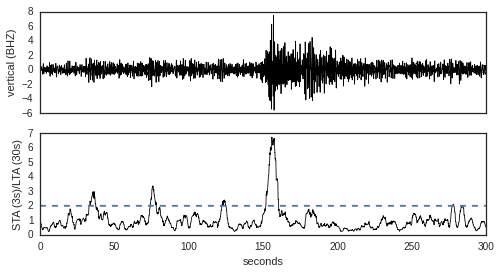

In [7]:

offset = 50
t = np.linspace(0-offset, len(bhzdata)/40.0-offset, len(bhzdata))

f = plt.figure(figsize=(8, 4))
ax1 = f.add_subplot(211)
ax1.plot(t, bhzdata, lw=0.8, color='black')
ax1.set_ylabel("vertical (BHZ)")
ax1.set_xticks([])

ax2 = f.add_subplot(212)
ax2.plot(t[1200:], stalta[1200:], lw=0.8, color='black')
ax2.set_ylabel("STA (3s)/LTA (30s)")
ax2.set_xlabel("seconds")

ax1.set_xlim(0, 300)
ax2.set_xlim(0, 300)

ax2.plot(t, np.ones(t.shape)*2, ls="--")


# Correlation

In [1]:
from sigvisa.signals.io import load_event_station_chan
from sigvisa.infer.template_xc import fastxc

w1 = load_event_station_chan(3375230, "ELK", "BHZ", pre_s=5, phases=["Pg", "Lg"], post_s=50)
wf1 = w1.filter("freq_0.8_4.5")

w2 = load_event_station_chan(3375263, "ELK", "BHZ", pre_s=5, phases=["Pg", "Lg"], post_s=50)
wf2 = w2.filter("freq_0.8_4.5")

1203605196.07 1203605258.16
1203616826.69 1203616888.75


/home/dmoore/python/sigvisa/treegp/gpy_linalg.py:39: UserWarning: warning: caught this exception:'module' object has no attribute '_dotblas'
  warnings.warn("warning: caught this exception:" + str(e))


In [6]:
from sigvisa.source.event import get_event
from sigvisa.utils.geog import dist_km
ev1 = get_event(evid=3375230)
ev2 = get_event(evid=3375263)
print ev1
print ev2

print dist_km((ev1.lon, ev1.lat), (ev2.lon, ev2.lat))
print ev1.time - ev2.time

evid 3375230.0, loc 114.92 W 41.15 N, depth 10.0km, time 1203605191.5, mb 3.1, natural source
evid 3375263.0, loc 114.90 W 41.16 N, depth 2.9km, time 1203616822.0, mb 2.9, natural source
1.62725763185
-11630.49


0.907946964333


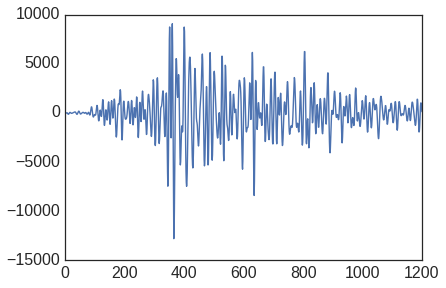

In [86]:

srate=40
sidx = 22*srate
extracted = wf1.data.data[sidx:52*srate]
plt.plot(extracted)


xc = fastxc(extracted, wf2.data.data)
print np.max(xc)


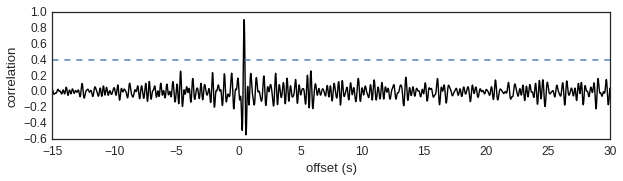

In [87]:

import seaborn as sns

sns.set_style("white")
sns.set_context("paper", font_scale=1.5)
f = plt.figure(figsize=(10, 5))
t = np.linspace(-sidx/float(srate), len(xc)/srate -sidx/float(srate), len(xc))
ax = f.add_subplot(212)
ax.plot(t, xc, color="black")
ax.set_xlim([-15, 30])
ax.plot(t, np.ones(t.shape)*0.4, ls="--")
ax.set_ylabel("correlation")
ax.set_xlabel("offset (s)")

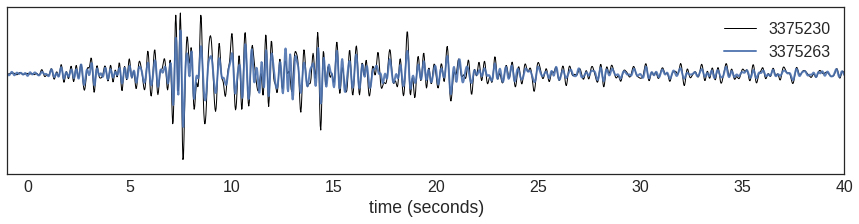

In [93]:

sns.set_style("white")
sns.set_context("paper", font_scale=2.0)

align_idx = np.argmax(xc) - sidx
align_s = align_idx / float(srate)

start_s = 24

t2 = np.linspace(-start_s, len(w2.data)/40.0 - start_s, len(w2.data))
t1 = np.linspace(-start_s + align_s, len(w1.data)/40.0 - start_s + align_s, len(w1.data))


f = plt.figure(figsize=(15, 3))
ax = f.add_subplot(111)
ax.plot(t1, wf1.data, lw=1, alpha=1, label="3375230", color="black")
ax.plot(t2, wf2.data, lw=2, alpha=0.9, label="3375263", ls="-")
ax.set_xlim([-1, 40])
ax.set_xlabel("time (seconds)")
ax.set_yticks([])
ax.legend(loc="upper right")

0.907599299476


In [2]:
from sigvisa.treegp.gp import GP, GPCov, prior_sample


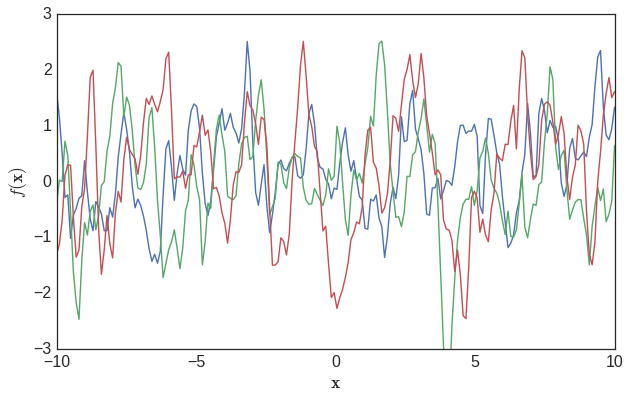

In [30]:

np.random.seed(1)

plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=2.0)
sns.set_style("white")
x = np.linspace(-10, 10, 200).reshape((-1, 1))

cov = GPCov(wfn_params=[1.0], dfn_params=[0.3], wfn_str="matern32", dfn_str="euclidean")
y = prior_sample(x, cov, 0.00001)
plt.plot(x, y, alpha=1.0, label="$\ell = 0.1$")
y = prior_sample(x, cov, 0.00001)
plt.plot(x, y, alpha=1.0, label="$\ell = 0.1$")
y = prior_sample(x, cov, 0.00001)
plt.plot(x, y, alpha=1.0, label="$\ell = 0.1$")
plt.ylim([-3, 3])

plt.xlabel("$\mathbf{x}$")
plt.ylabel("$f(\mathbf{x})$")

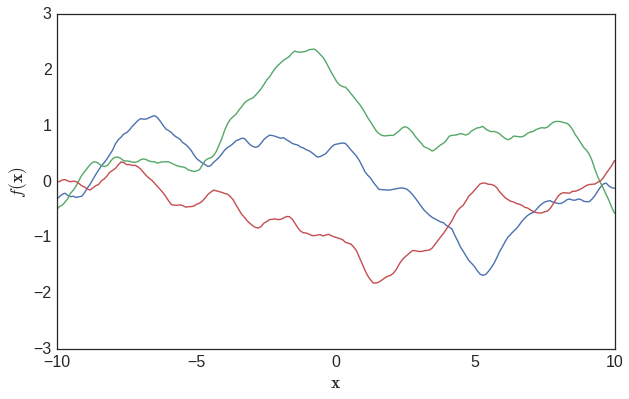

In [31]:

np.random.seed(6)

plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=2.0)
sns.set_style("white")
x = np.linspace(-10, 10, 200).reshape((-1, 1))

cov = GPCov(wfn_params=[1.0], dfn_params=[3.0], wfn_str="matern32", dfn_str="euclidean")
y = prior_sample(x, cov, 0.00001)
plt.plot(x, y)
y = prior_sample(x, cov, 0.00001)
plt.plot(x, y)
y = prior_sample(x, cov, 0.00001)
plt.plot(x, y)
plt.ylim([-3, 3])
plt.xlabel("$\mathbf{x}$")
plt.ylabel("$f(\mathbf{x})$")

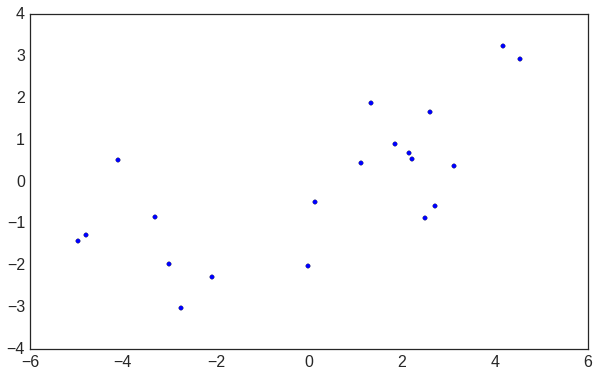

In [109]:

np.random.seed(10)

plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=2.0)
sns.set_style("white")

nv=0.5
xs = (np.random.rand(20) * 10 - 5).reshape((-1, 1))
#x = np.linspace(-10, 10, 200)

cov = GPCov(wfn_params=[1.0], dfn_params=[1.0], wfn_str="matern32", dfn_str="euclidean")
y = prior_sample(xs, cov, nv)

lin = (xs * 0.3).flatten()

yl = y + lin
plt.scatter(xs, yl)

In [110]:
param_mean = np.zeros((2,))
param_cov = np.eye(2)

gp1 = GP(X=xs, y=yl, noise_var=nv, cov_main=cov, 
        param_mean=param_mean, param_cov=param_cov, extract_dim=(0,), basis="mlinear")

gp2 = GP(X=xs, y=yl, noise_var=nv, cov_main=cov)

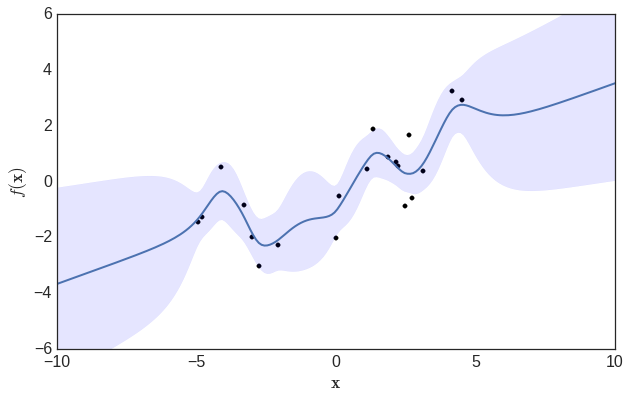

In [111]:
x = np.linspace(-10, 10, 200).reshape((-1, 1))
ys = np.array([gp1.predict(xx.reshape((-1, 1))) for xx in x])
vs = np.array([float(gp1.variance(xx.reshape((-1, 1)), include_obs=False)) for xx in x])

f = plt.figure(figsize=(10, 6))
ax = f.add_subplot(111)
ax.scatter(xs, yl, color="black")
ax.plot(x, ys, lw=2)
ax.fill_between(x.flatten(),  ys - 2*np.sqrt(vs), ys + 2*np.sqrt(vs), color="blue", alpha=0.1)
ax.set_ylim([-6, 6])
ax.set_xlim([-10, 10])
ax.set_xlabel("$\mathbf{x}$")
ax.set_ylabel("$f(\mathbf{x})$")

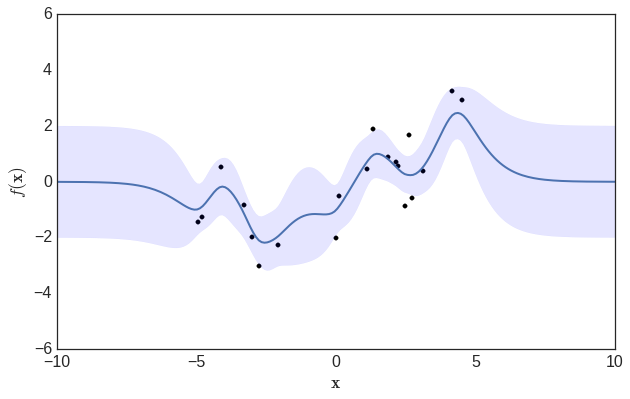

In [112]:
x = np.linspace(-10, 10, 200).reshape((-1, 1))
ys = np.array([gp2.predict(xx.reshape((-1, 1))) for xx in x])
vs = np.array([float(gp2.variance(xx.reshape((-1, 1)), include_obs=False)) for xx in x])

f = plt.figure(figsize=(10, 6))
ax = f.add_subplot(111)
ax.scatter(xs, yl, color="black")
ax.plot(x, ys, lw=2)
ax.fill_between(x.flatten(),  ys - 2*np.sqrt(vs), ys + 2*np.sqrt(vs), color="blue", alpha=0.1)
ax.set_ylim([-6, 6])
ax.set_xlim([-10, 10])
ax.set_xlabel("$\mathbf{x}$")
ax.set_ylabel("$f(\mathbf{x})$")

# DPRK correlations

In [85]:
import os 

site="MDJ"
chan="BHZ"

basedir="dprk_signals"
evdirs = os.listdir(basedir)
print evdirs

sts = {}
for d in evdirs:
    fnames = os.listdir(os.path.join(basedir, d))
    relevant = sorted([fname for fname in fnames if site in fname and chan in fname and fname.endswith(".SAC")])
    try:
        fname = os.path.join(basedir, d, relevant[0])
    except:
        print "no signals found for", d
        continue
    st = obspy.read(fname)
    sts[d] = st
    print "loaded", fname

['2016-09-09-mb53-north-korea', '2009-05-25-mb47-north-korea', '2016-01-06-mb51-north-korea', '2006-10-09-mb43-north-korea', '2013-02-12-mb51-north-korea']
loaded dprk_signals/2016-09-09-mb53-north-korea/IC.MDJ.00.BHZ.M.2016.253.002955.SAC
loaded dprk_signals/2009-05-25-mb47-north-korea/IC.MDJ.00.BHZ.M.2009.145.005435.SAC
loaded dprk_signals/2016-01-06-mb51-north-korea/IC.MDJ.00.BHZ.M.2016.006.012954.SAC
loaded dprk_signals/2006-10-09-mb43-north-korea/IC.MDJ.00.BHZ.M.2006.282.013520.SAC
loaded dprk_signals/2013-02-12-mb51-north-korea/IC.MDJ.00.BHZ.M.2013.043.025744.SAC


In [86]:
signals = {}
for d, st in sts.items():
    srate = st[0].stats["sampling_rate"]
    sidx = int(srate * 58)
    eidx = int(sidx + srate * 20)
    filtered = obspy.signal.filter.bandpass(st[0].data, 0.8, 4.5, srate)[sidx:eidx]
    normed = filtered / np.max(filtered)
    signals[d] = normed

19
3
5
26


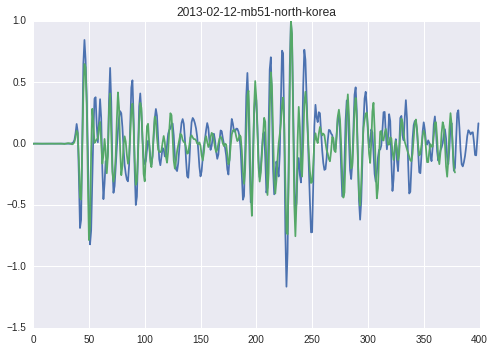

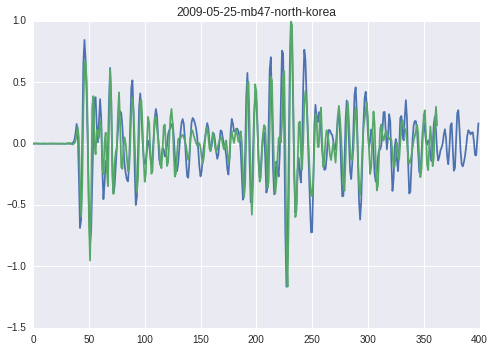

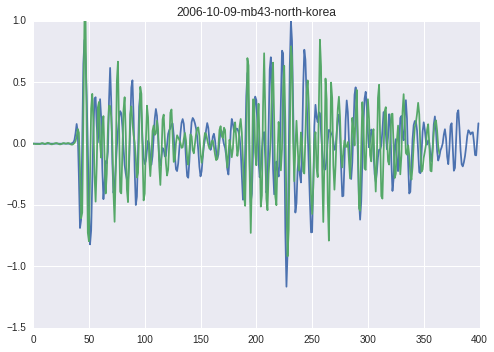

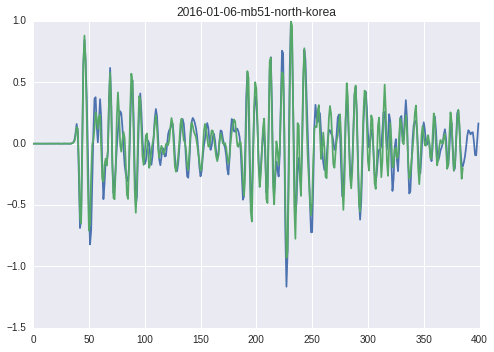

In [87]:
base_key = sorted(signals.keys())[-1]
base_data = signals[base_key]

aligned_data = {base_key: base_data}

for d, data in signals.items():
    if d==base_key: continue
    
    xcs = fastxc(data[40:200], base_data)
    align_idx = np.argmax(xcs)
    print align_idx
    aligned_data[d] = data[40-align_idx:]
    
    
    plt.figure()
    plt.plot(base_data)
    plt.plot(aligned_data[d])
    plt.title(d)
    
    

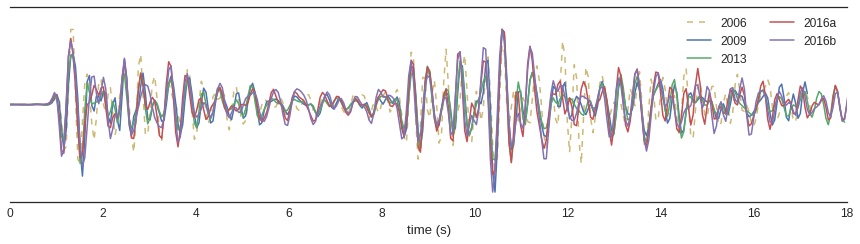

In [156]:
t = np.linspace(-1, 19, len(base_data))


sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

palette = sns.color_palette()

plt.figure(figsize=(15, 3.5))

args = {
    '2016-09-09-mb53-north-korea': {"label": "2016b", "ls": "-", "color": palette[3]},
    '2013-02-12-mb51-north-korea': {"label": "2013", "ls": "-", "color": palette[1]}, 
    '2009-05-25-mb47-north-korea': {"label": "2009", "ls": "-", "color": palette[0]}, 
    '2006-10-09-mb43-north-korea': {"label": "2006", "ls": "--", "color": palette[4]},
    '2016-01-06-mb51-north-korea': {"label": "2016a", "ls": "-", "color": palette[2]},
}
for k, dd in sorted(aligned_data.items()):
    #if "2006" in k: continue
    plt.plot(t[:len(dd)], dd, alpha=1.0, lw=1.5, **args[k])

plt.xlim([0, 18])
plt.ylim([-1.3, 1.3])
plt.xlabel("time (s)")
plt.yticks([])
plt.legend(ncol=2)

ax = plt.gca()
#ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)